# Maps

## Display Cities we scraped data from on Apartments.com

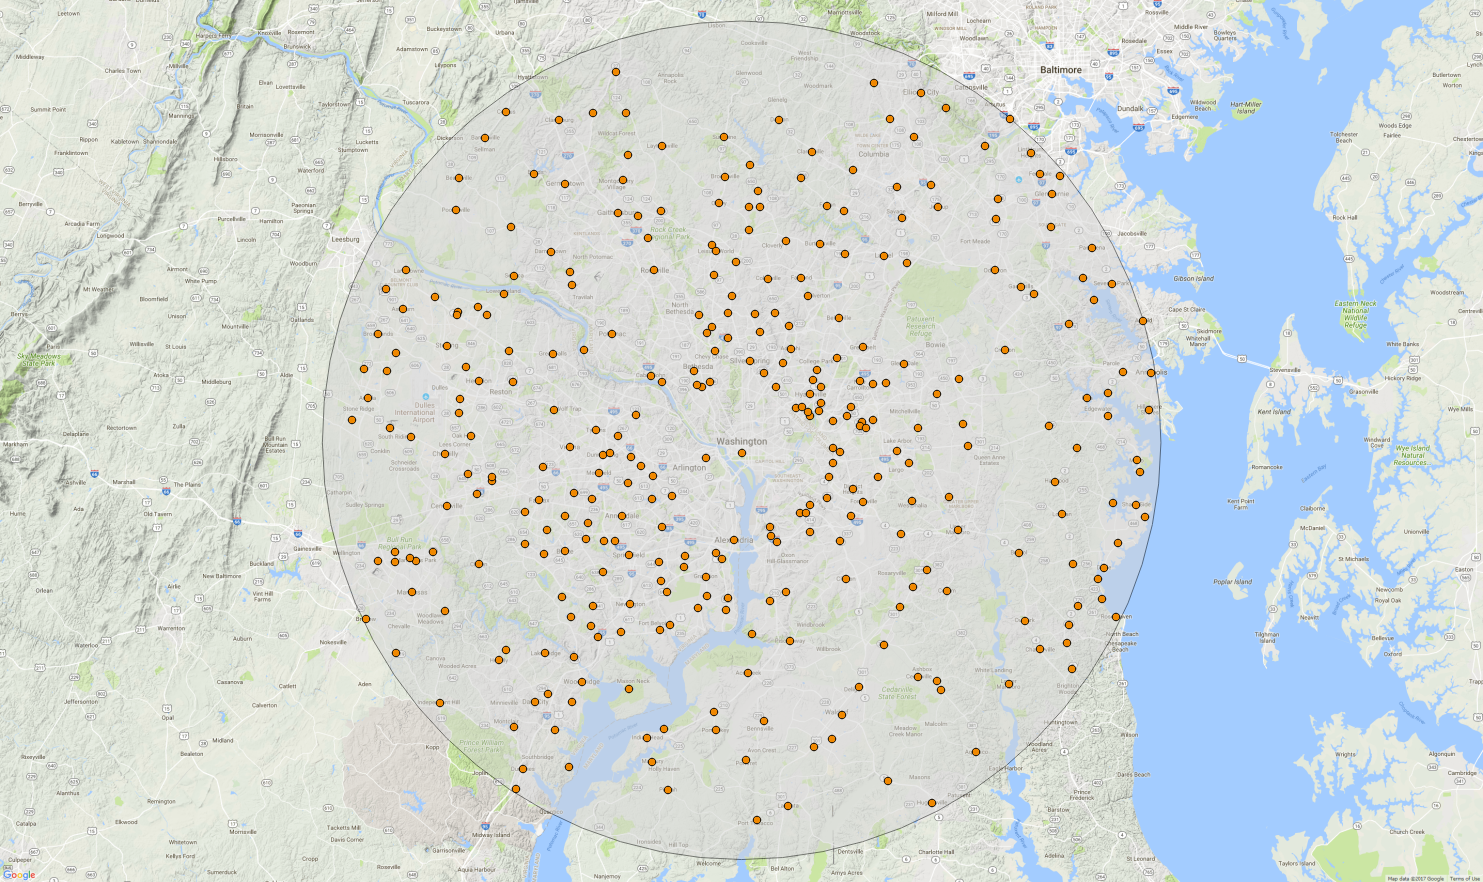

In [1]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Thirty Mile Buffer Cities.png')


## Display Properties

In [2]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Thirty Mile Buffer Properties.png')


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Display Cities and Properties

In [3]:
from IPython.display import Image
file = 'C:\\Users\\NKallfa\\Desktop\\Documents\\Georgetown Data Science Certificate\\DMV\\presentation\\images\\'
Image(filename=file + 'Thirty Mile Buffer Cities Properties.png')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


<img src = "C:\Users\NKallfa\Desktop\Documents\Georgetown Data Science Certificate\DMV\presentation\images">

# Import Data and Connect to Database 



In [71]:
from mysql.connector import connection
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

dsn_database = "property" #'demographic' or 'property'
dsn_hostname = "georgetownanalyticscapstone.c50pz9jksixq.us-east-1.rds.amazonaws.com"
dsn_port = 3306
dsn_uid = "sanemkabaca"
dsn_pwd = "georgetowndmv"



db_connection = connection.MySQLConnection(user=dsn_uid, password=dsn_pwd,
                                 host=dsn_hostname,
                                 database=dsn_database)

In [5]:
query = ("""SELECT * FROM full_dataset""")

In [6]:
df = pd.read_sql(query, con=db_connection)
df.head()


,unit_id,pid,property_name,zip_code,minrent,maxrent,beds,baths,minsqft,maxsqft,...,poverty_per_house_rec_SNAP_type_fam_unmarried,poverty_per_house_norec_SNAP_type_fam_unmarried,poverty_per_house_type_not_fam,poverty_per_house_rec_SNAP_type_not_fam,poverty_per_house_norec_SNAP_type_not_fam,poverty_per_house_type_w_children,poverty_per_house_rec_SNAP_type_w_children,poverty_per_house_norec_SNAP_type_w_children,poverty_per_house_poverty_below,poverty_per_house_poverty_at_above
0,1,0,1801 Catherine Fran Dr,20607,1300.0,1300.0,2,1,1500,1500,...,9.9,19.4,15.4,32.2,14.8,40.3,33.9,40.5,2.4,97.6
1,2,1,17211 Summerwood Ln,20607,3000.0,3000.0,4,5,5002.240151,5002.240151,...,9.9,19.4,15.4,32.2,14.8,40.3,33.9,40.5,2.4,97.6
2,3,2,911 Strausberg St,20607,3000.0,3000.0,4,4,3159.504746,3159.504746,...,9.9,19.4,15.4,32.2,14.8,40.3,33.9,40.5,2.4,97.6
3,4,3,Daniel's Run,20783,1415.0,1470.0,1,1,725,725,...,57.5,30.6,30.1,10.1,32.7,42.6,78.4,38.1,13,87
4,5,3,Daniel's Run,20783,1470.0,1470.0,1,1,725,725,...,57.5,30.6,30.1,10.1,32.7,42.6,78.4,38.1,13,87


# Examining the Data

In [7]:
query1 = ("""SELECT * FROM property.property_type""")
df_type = pd.read_sql(query1, con = db_connection)

query2 = ("""SELECT * FROM property.property_address""")
df_address = pd.read_sql(query2, con = db_connection)

query3 = ("""SELECT * FROM property.property_units""")
df_units = pd.read_sql(query3, con = db_connection)

## Number of Units

In [8]:
df_units.shape

(36273, 8)

## Number of Null Rent Values

In [9]:
pd.isnull(df_units.minrent).sum()

6552

In [10]:
# Percentage of all units?
6552/36273*100

18.063022082540733

## Count of Properties by State

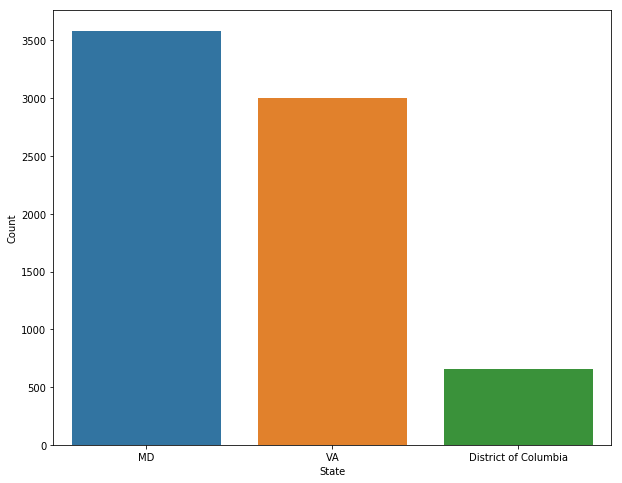

In [11]:
df_address.state = df_address.state.apply(lambda x: x.strip())
count_state = df_address.state.value_counts()

count_state = pd.DataFrame(count_state).reset_index().rename(columns = {"index":"State","state":"Count"})

plt.figure(figsize=(10, 8))
sns.barplot(x = "State", y = "Count", data = count_state)

## Count of Properties by Type

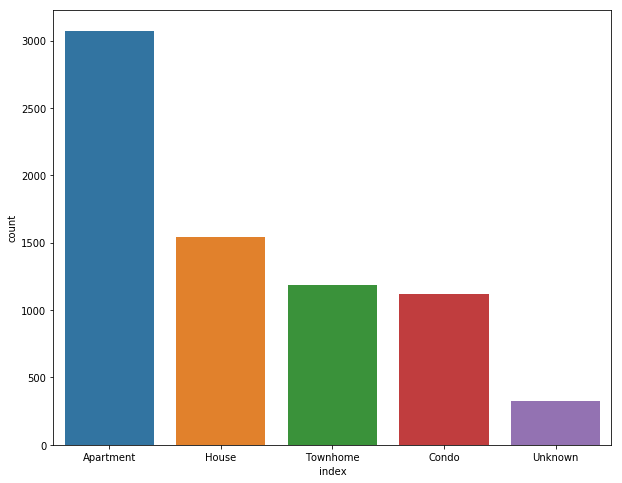

In [12]:
type_count = df_type.type.value_counts().to_frame("count").reset_index().rename({"index":"type"})

plt.figure(figsize=(10, 8))
sns.barplot(x = "index", y = "count", data = type_count)

## Count of Properties by Beds

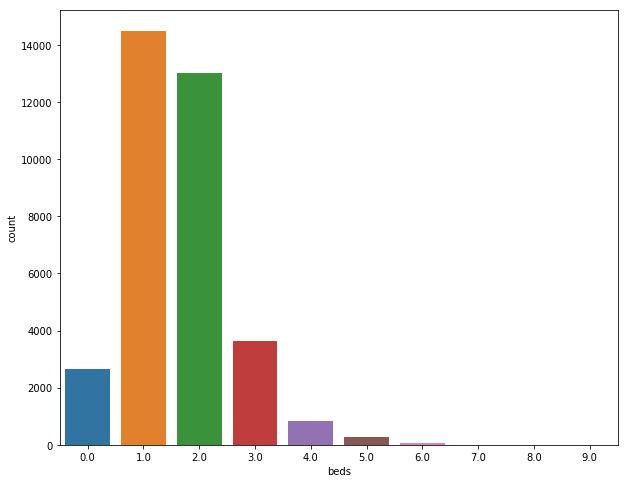

In [13]:
bed_counts = df_units.beds.value_counts().to_frame("count").reset_index()
bed_counts = bed_counts.rename(index=str, columns={"index": "beds"})

plt.figure(figsize=(10, 8))
sns.barplot(x = "beds", y = "count", data = bed_counts)

## Count of Properties by Baths

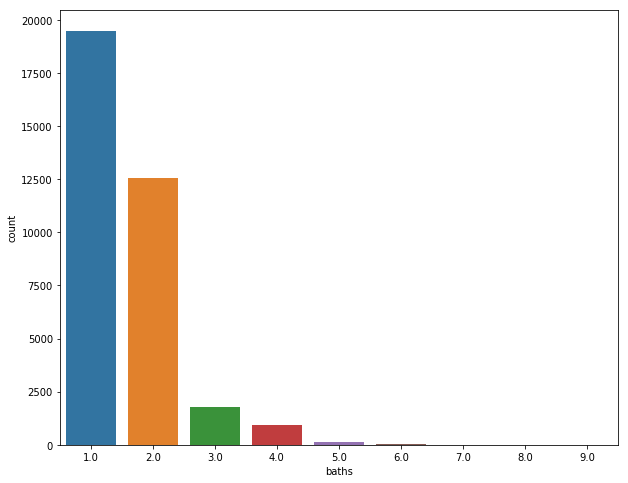

In [14]:
bath_counts = df_units.baths.value_counts().to_frame("count").reset_index()
bath_counts = bath_counts.rename(index=str, columns={"index": "baths"})

plt.figure(figsize=(10, 8))
sns.barplot(x = "baths", y = "count", data = bath_counts)

## Box Plot of Beds vs Minimum Rent

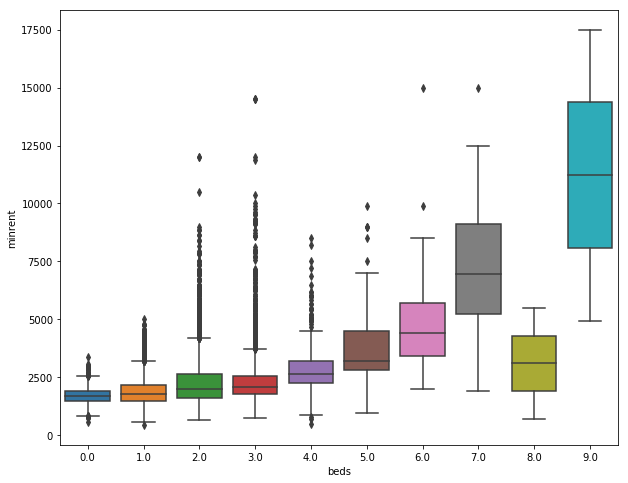

In [15]:
df_units.beds = pd.to_numeric(df_units.beds)
df_units.baths = pd.to_numeric(df_units.baths)
df_units.minrent = pd.to_numeric(df_units.minrent)
df_units.maxrent = pd.to_numeric(df_units.maxrent)
df_units.minsqft = pd.to_numeric(df_units.minsqft)
df_units.maxsqft = pd.to_numeric(df_units.maxsqft)

plt.figure(figsize=(10, 8))
sns.boxplot(x = "beds", y = "minrent", data = df_units)

In [16]:
# Rent for 8-bedrooms are lower because we only have 2 samples in our data set
bed_counts

,beds,count
0,1.0,14502
1,2.0,13019
2,3.0,3648
3,0.0,2651
4,4.0,831
5,5.0,258
6,6.0,46
7,7.0,8
8,9.0,2
9,8.0,2


## Box Plot of Beds vs Maximum Rent

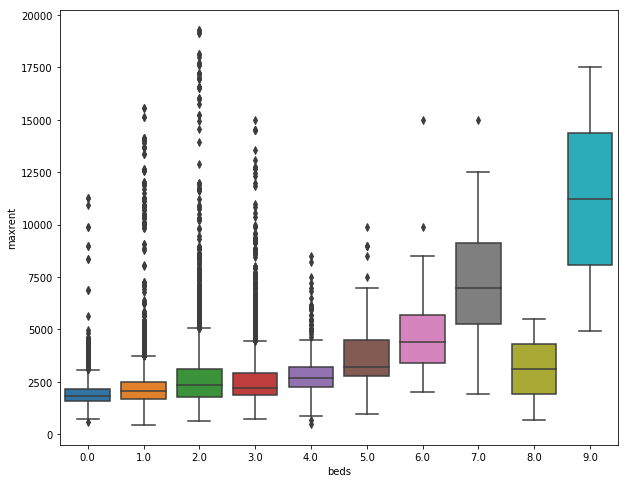

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = "beds", y = "maxrent", data = df_units)

## Box Plot of Beds vs Average Rent

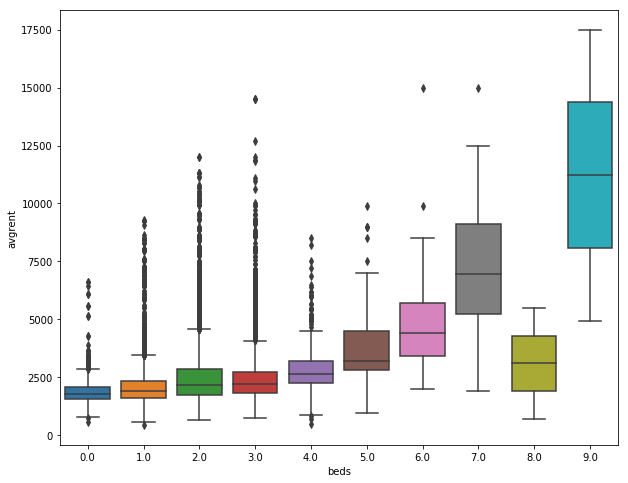

In [18]:
df_units

df_units["avgrent"] = (df_units.minrent + df_units.maxrent)/2

plt.figure(figsize=(10, 8))
sns.boxplot(x = "beds", y = "avgrent", data = df_units)

## Box Plot of State vs Average Rent

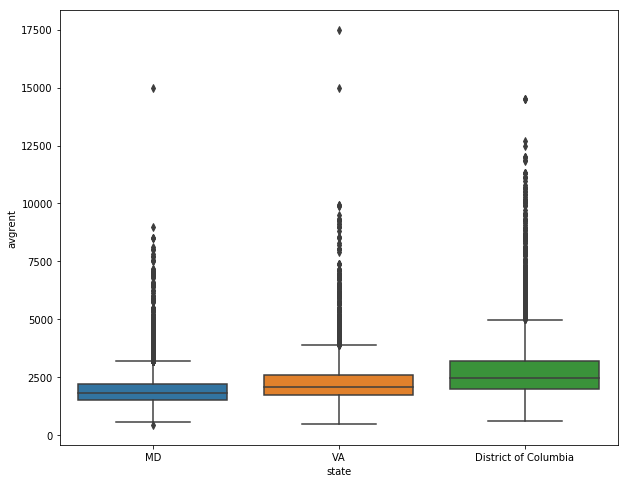

In [19]:
df_units["avgrent"] = (df_units.minrent + df_units.maxrent)/2

address_unit = df_address.join(df_units.set_index("pid"), on = "pid", how = "inner", rsuffix = "_u")

address_unit.head()
plt.figure(figsize=(10, 8))
sns.boxplot(x = "state", y = "avgrent", data = address_unit)

## Box Plot of Beds vs Minimum SqFt

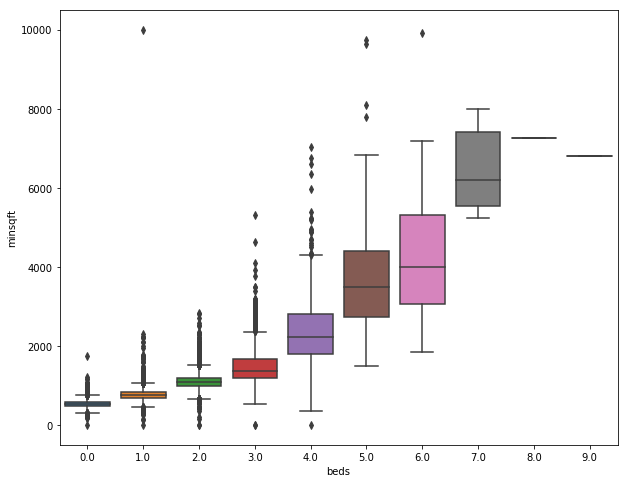

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = "beds", y = "minsqft", data = df_units)

## Box Plot of Beds vs Maximum SqFt

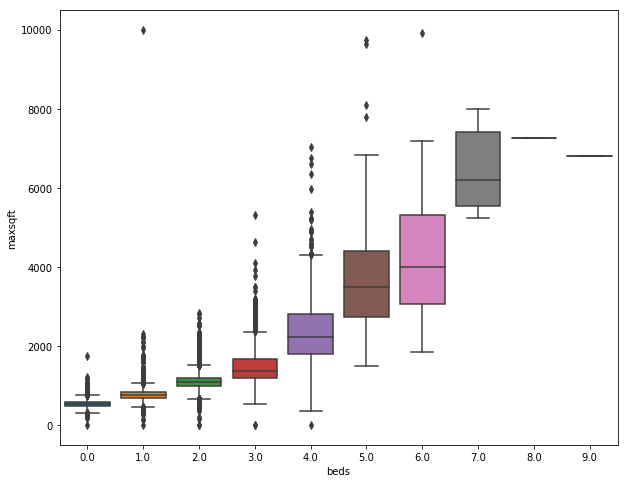

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = "beds", y = "maxsqft", data = df_units)

## Count of Bedroom-Bathroom combinations

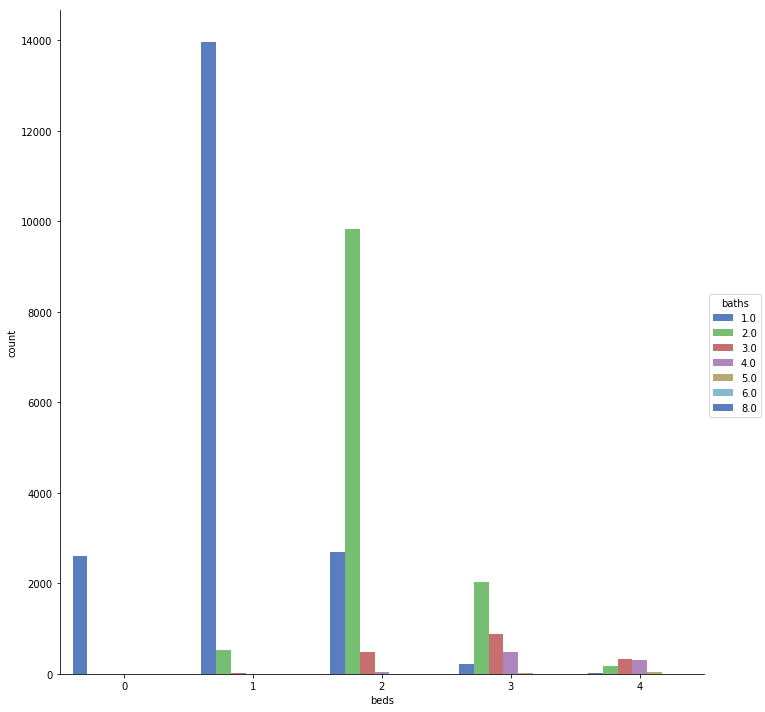

In [22]:
len(df_units.groupby(["beds", "baths"]).pid.count().to_frame().pid[9])

beds = []
baths = []
counts = []
for i in range(0, 10):
    Count = len(df_units.groupby(["beds", "baths"]).pid.count().to_frame().pid[i])
    for j in range(0, Count):
        beds.append(i)
        ba = df_units.groupby(["beds", "baths"]).pid.count().to_frame().pid[i].index[j]
        count = df_units.groupby(["beds", "baths"]).pid.count().to_frame().pid[i].to_frame().iloc[j,0]
        baths.append(ba)
        counts.append(count)

bed_bath_counts = pd.DataFrame({"beds":beds, "baths":baths, "count":counts})
bed_bath_counts = bed_bath_counts[["beds", "baths", "count"]]
bed_bath_counts


sns.factorplot(x="beds", y="count", hue="baths", data=bed_bath_counts.loc[(bed_bath_counts.beds <= 4),],
               size = 10, kind="bar", palette="muted")

# Features of each Property - How common are they?

In [23]:
query4 = ("""SELECT * FROM property.property_features""")
df_features = pd.read_sql(query4, con = db_connection)

query5 = ("""SELECT * FROM property.property_gym""")
df_gym = pd.read_sql(query5, con = db_connection)

query6 = ("""SELECT * FROM property.property_indoor_info""")
df_indoor_info = pd.read_sql(query6, con = db_connection)

query7 = ("""SELECT * FROM property.property_kitchen""")
df_kitchen = pd.read_sql(query7, con = db_connection)

query8 = ("""SELECT * FROM property.property_living_space""")
df_living_space = pd.read_sql(query8, con = db_connection)

query9 = ("""SELECT * FROM property.property_outdoor_info""")
df_outdoor_info = pd.read_sql(query9, con = db_connection)

query10 = ("""SELECT * FROM property.property_parking""")
df_parking = pd.read_sql(query10, con = db_connection)

query11 = ("""SELECT * FROM property.property_pets""")
df_pets = pd.read_sql(query11, con = db_connection)

query12 = ("""SELECT * FROM property.property_services""")
df_services = pd.read_sql(query12, con = db_connection)

### One hot encoding of property features

In [24]:
df_features.head()

,pid,ac,alarm,cableready,ceilfans,doublevanities,fireplace,framedmirror,handrail,heating,...,sprinklers,ssound,storage,trashcompact,tubshower,vacuumsys,washdry,washdryhookup,wheelchacc,wifi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,1,1,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0
4,4,1,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


## General Property Features

[(0, 1)]

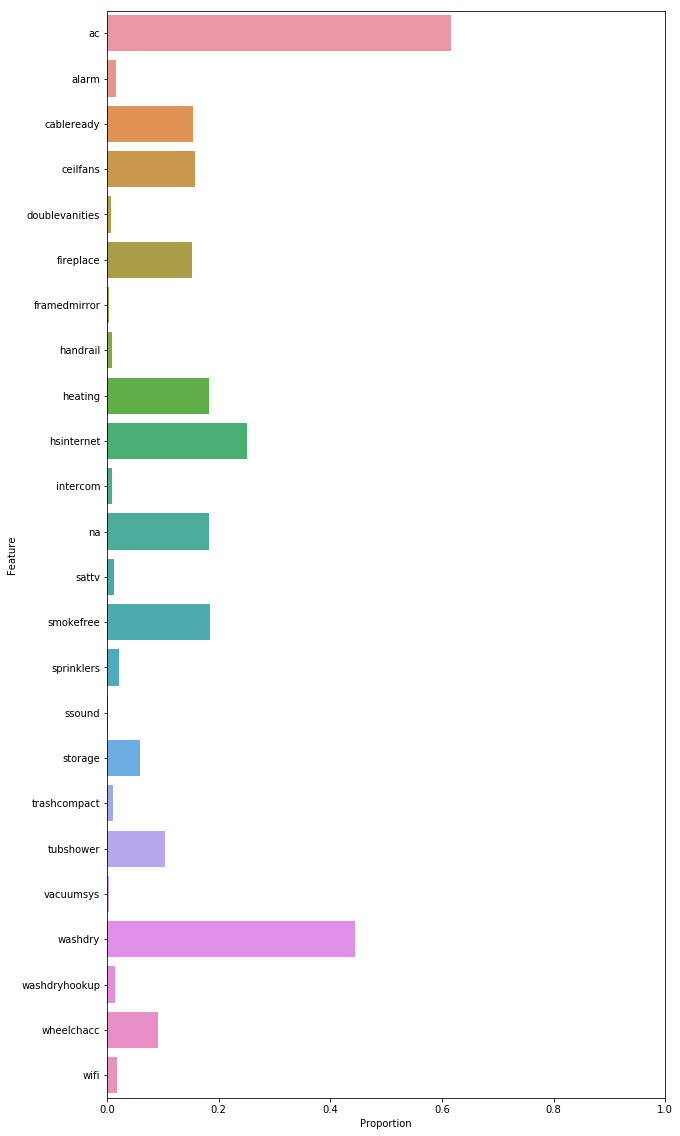

In [25]:
feature_avg = pd.DataFrame(df_features[list(df_features.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = feature_avg, orient = "h", ).set(xlim = (0,1))

## Gym-Related Property Features

[(0, 1)]

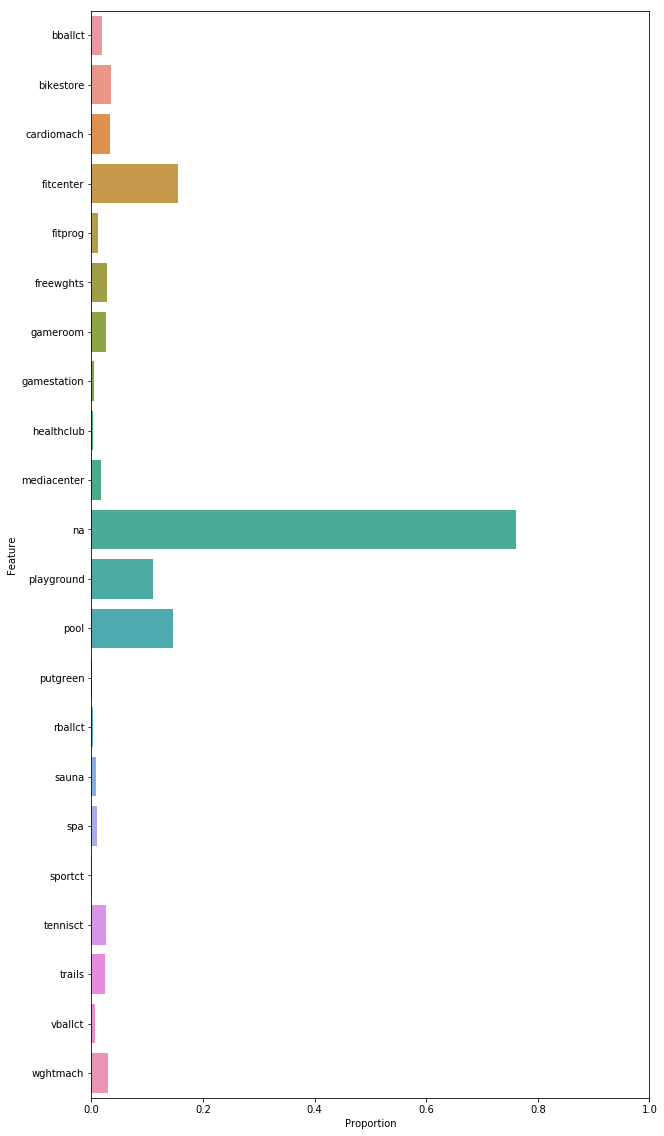

In [26]:
gym_avg = pd.DataFrame(df_gym[list(df_gym.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = gym_avg, orient = "h", ).set(xlim = (0,1))

## Indoor-Related Property Features

[(0, 1)]

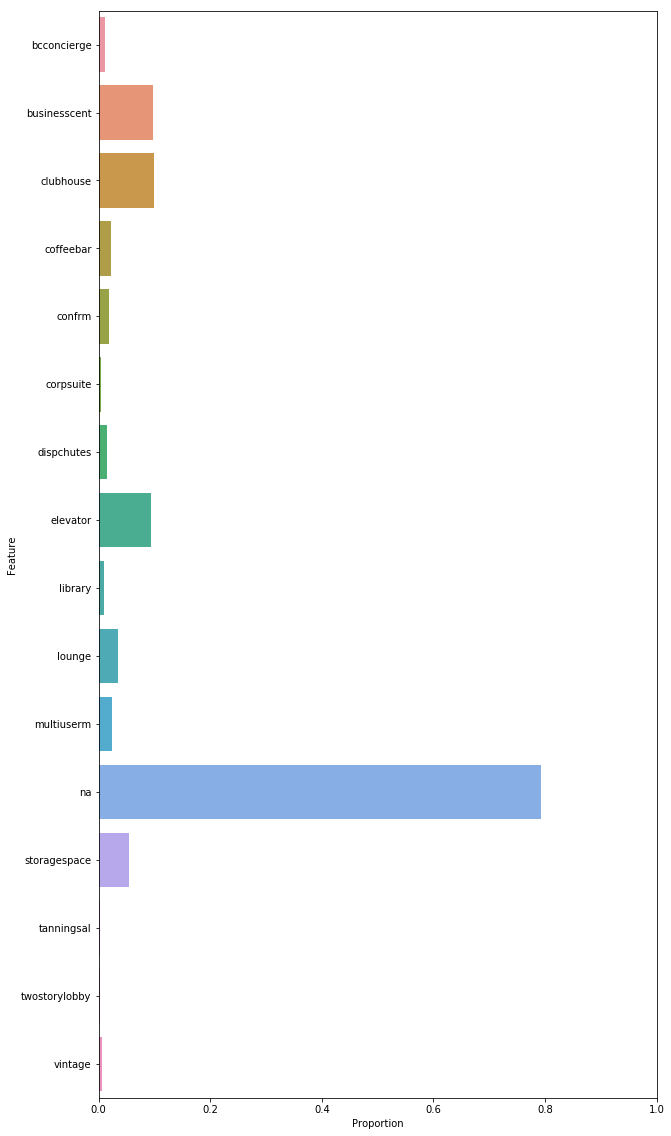

In [27]:
indoor_avg = pd.DataFrame(df_indoor_info[list(df_indoor_info.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = indoor_avg, orient = "h", ).set(xlim = (0,1))

## Outdoor-Related Property Features

[(0, 1)]

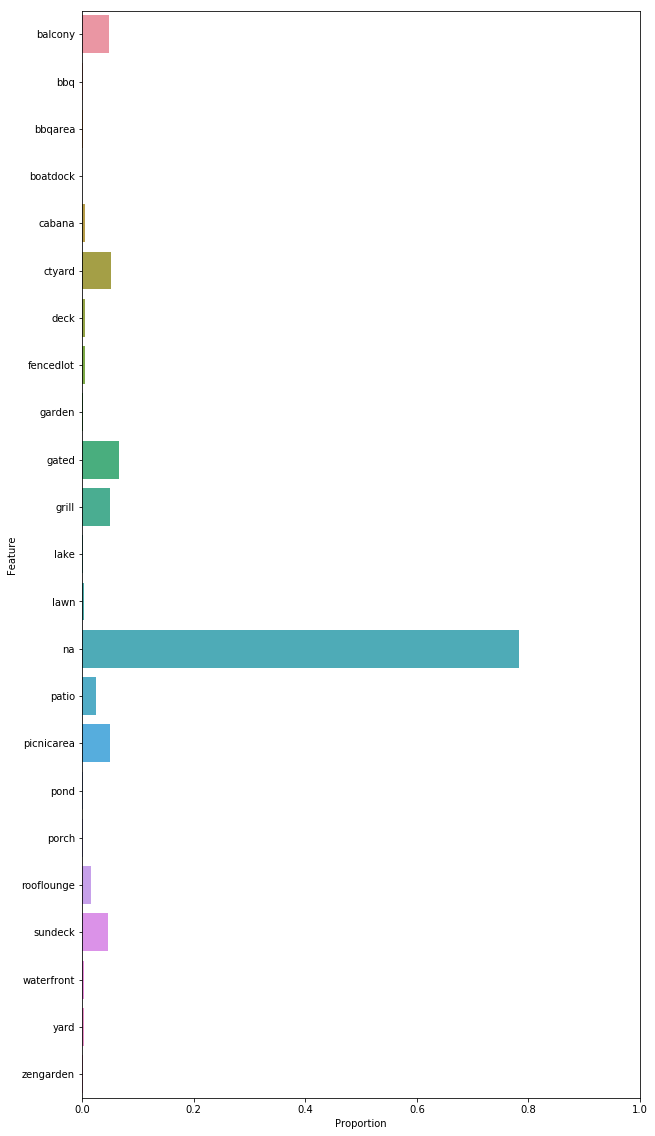

In [28]:
outdoor_avg = pd.DataFrame(df_outdoor_info[list(df_outdoor_info.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = outdoor_avg, orient = "h", ).set(xlim = (0,1))

## Kitchen-Related Property Features

[(0, 1)]

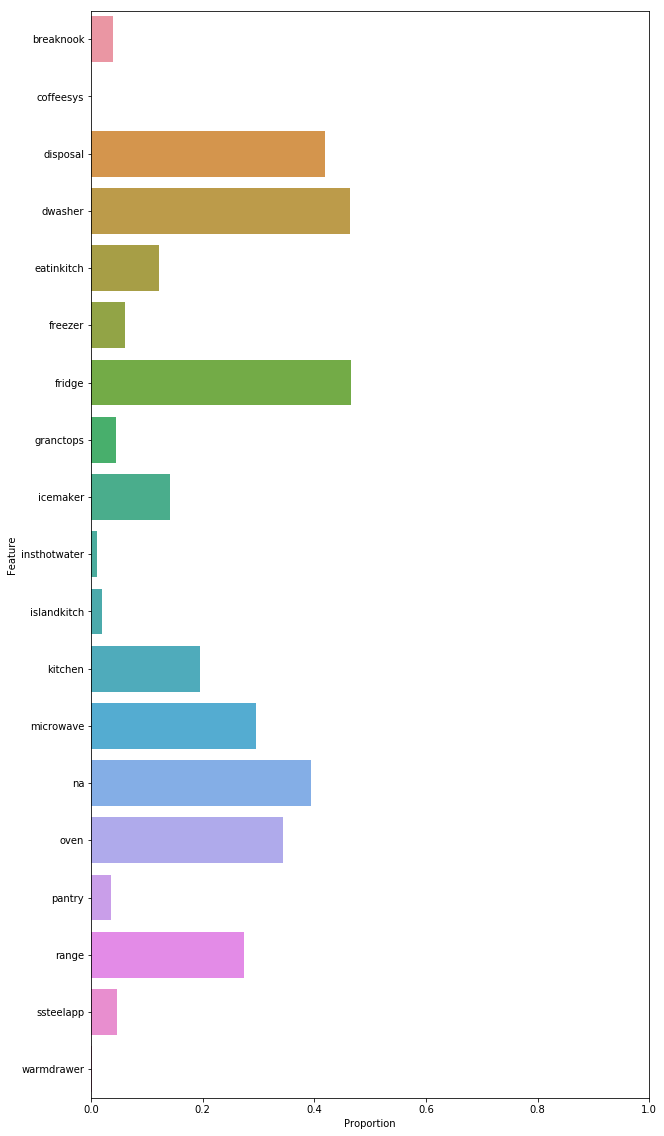

In [29]:
kitchen_avg = pd.DataFrame(df_kitchen[list(df_kitchen.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = kitchen_avg, orient = "h", ).set(xlim = (0,1))

## Living Space Related Property Features

[(0, 1)]

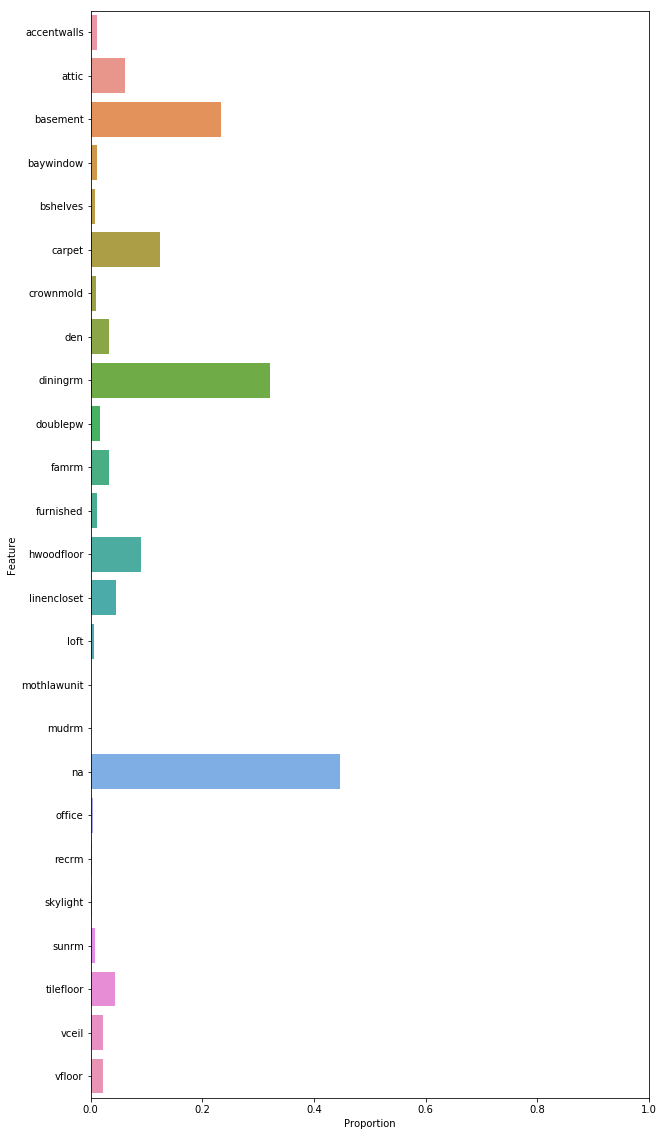

In [30]:
living_space_avg = pd.DataFrame(df_living_space[list(df_living_space.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = living_space_avg, orient = "h", ).set(xlim = (0,1))

## Parking-Related Property Features

[(0, 1)]

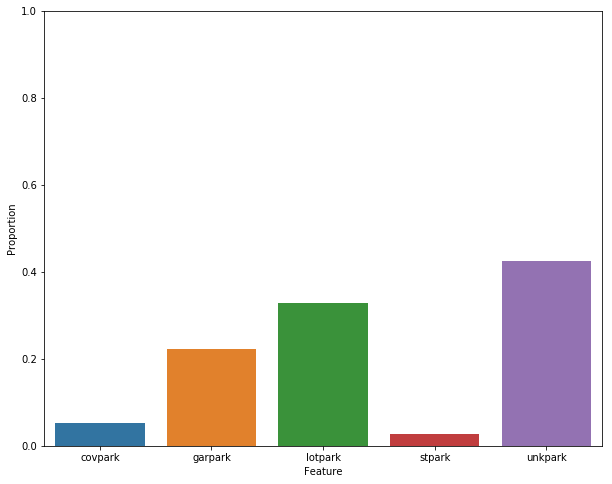

In [31]:
park_avg = pd.DataFrame(df_parking[list(df_parking.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 8))
sns.barplot(x = "Feature", y = "Proportion", data = park_avg).set(ylim = (0,1))

## Pets-Related Property Features

[(0, 1)]

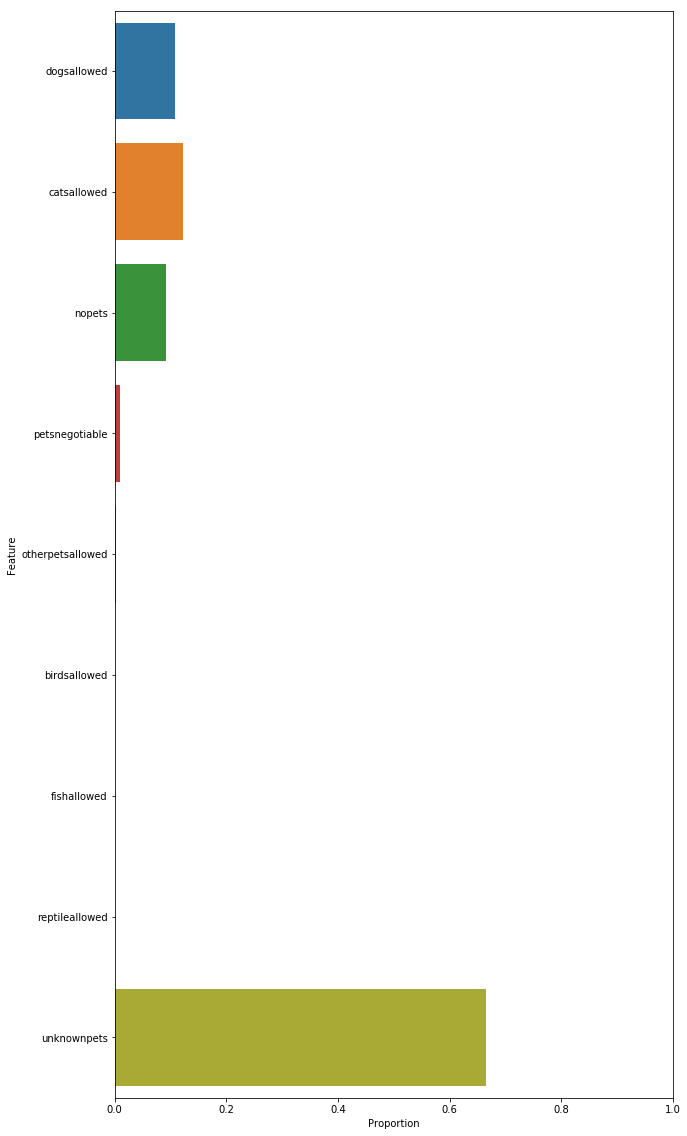

In [32]:
pets_avg = pd.DataFrame(df_pets[list(df_pets.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = pets_avg, orient = "h", ).set(xlim = (0,1))

## Service-Related Property Features

[(0, 1)]

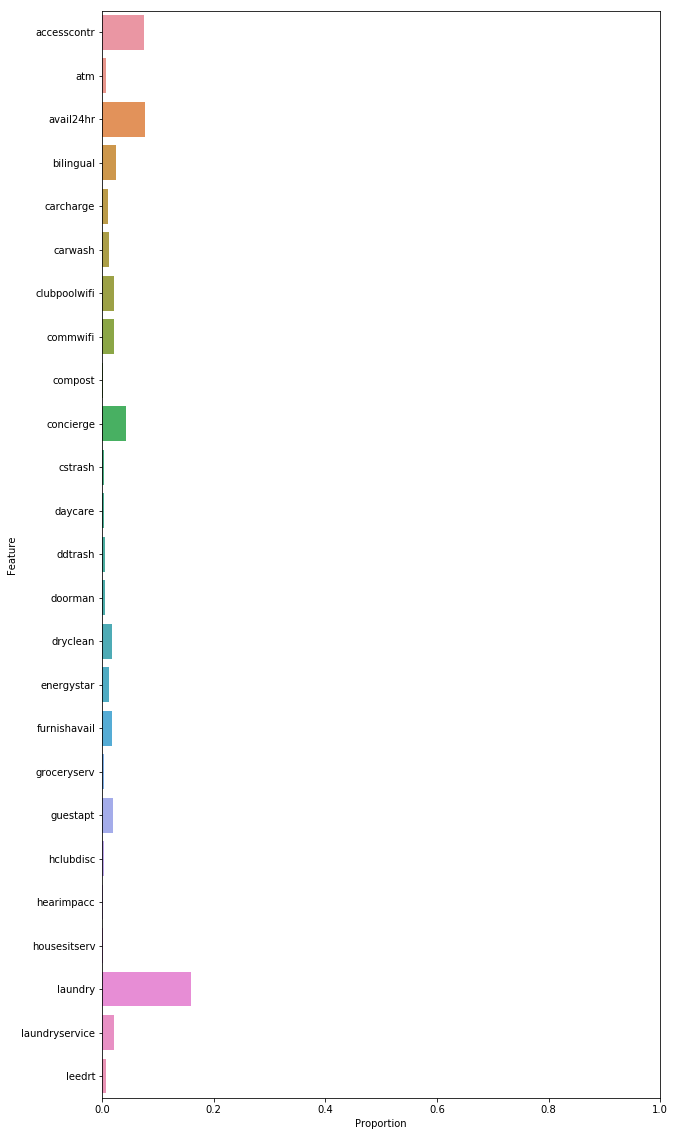

In [33]:
services_avg = pd.DataFrame(df_services[list(df_services.columns[1:26])].mean(axis = 0)).reset_index().rename(columns = {"index":"Feature",0:"Proportion"})

plt.figure(figsize=(10, 20))
sns.barplot(y = "Feature", x = "Proportion", data = services_avg, orient = "h", ).set(xlim = (0,1))

## Relationship Between Average Rent and Distance to Downtown DC?

In [34]:
query13 = ("""SELECT * FROM property.property_distance_to_dc""")
df_distance_dc = pd.read_sql(query13, con = db_connection)

In [35]:
df_distance_dc.distancetodc = pd.to_numeric(df_distance_dc.distancetodc)
distdc_unit = df_distance_dc.join(df_units.set_index("pid"), on = "pid", how = "inner", rsuffix = "_u")

distdc_unit.head()

,pid,distancetodc,unit_id,beds,baths,minrent,maxrent,minsqft,maxsqft,avgrent
0,0,9.99,1,2.0,1.0,1300.0,1300.0,1500.0,1500.0,1300.0
1,1,9.99,2,4.0,5.0,3000.0,3000.0,NaN,NaN,3000.0
2,2,9.99,3,4.0,4.0,3000.0,3000.0,NaN,NaN,3000.0
3,3,7.63,4,1.0,1.0,1415.0,1470.0,725.0,725.0,1442.5
3,3,7.63,5,1.0,1.0,1470.0,1470.0,725.0,725.0,1470.0


[(50, 0)]

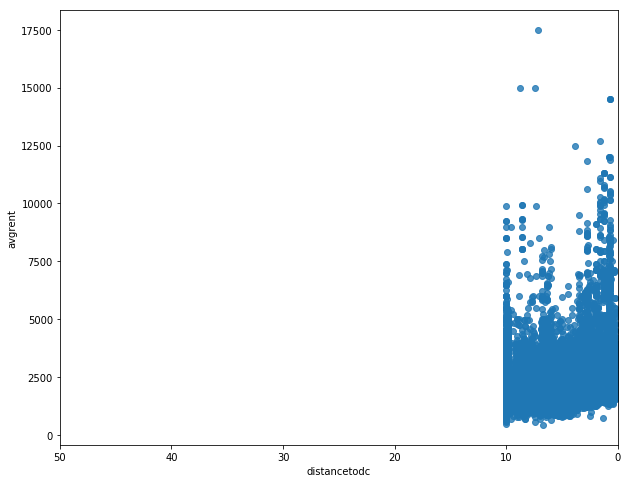

In [36]:
plt.figure(figsize=(10, 8))
sns.regplot(x = "distancetodc", y = "avgrent", data = distdc_unit, lowess = True).set(xlim = (50,0))

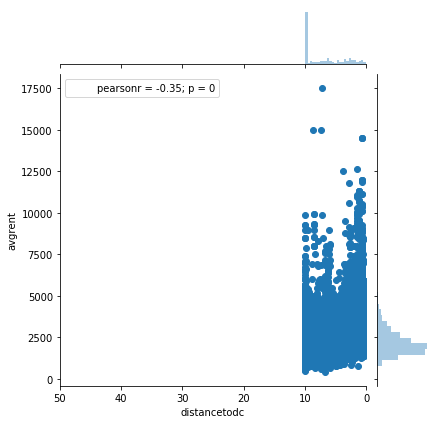

In [37]:
sns.jointplot(x = "distancetodc", y = "avgrent", data = distdc_unit, xlim = (50,0))

## Relationship Between Average Rent and Distance to Metro Station?

In [38]:
query14 = ("""SELECT * FROM property.property_unit_metro_station""")
df_metro = pd.read_sql(query14, con = db_connection)

In [39]:
df_metro.head()
df_units.head()

metro_unit = df_address.join(df_metro.set_index("pid"), on = "pid", how = "inner", rsuffix = "_u")

In [40]:
metro_unit.reset_index(drop = True, inplace = True)
metro_unit.distance = pd.to_numeric(metro_unit.distance)

NMetro = []
MinDist = []

for i in range(0, len(metro_unit)):
    Missing = pd.isnull(metro_unit.iloc[i,].distance)
    if (Missing == True):
        NMetro.append(0)
        MinDist.append(np.NaN)
    else:
        pid = metro_unit.iloc[i,].pid
        L = len(metro_unit.loc[metro_unit.pid == pid,])
        MinDist_temp = min(metro_unit.loc[metro_unit.pid == pid,].distance)
        NMetro.append(L)
        MinDist.append(MinDist_temp)
        
metro_unit["NMetro"] = NMetro
metro_unit["MinDist"] = MinDist

In [41]:
df_nmetro = metro_unit[["pid", "NMetro","MinDist"]]

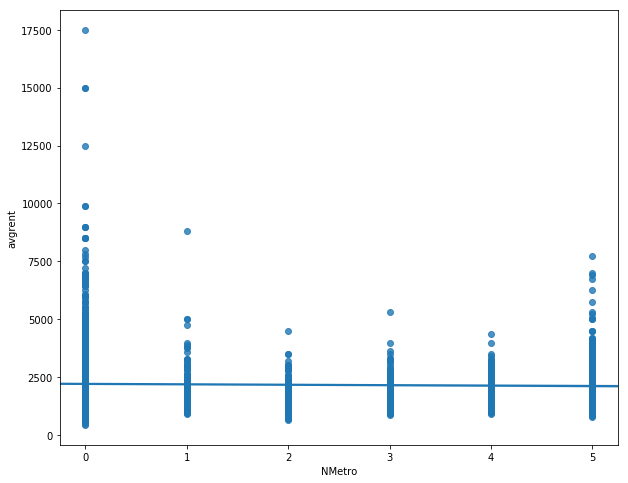

In [42]:
df_nmetro = df_nmetro.drop_duplicates(keep = "first").reset_index(drop = True)
df_nmetro2 = df_nmetro.join(df_units.set_index("pid"), on = "pid", how = "inner", rsuffix = "_u")
df_nmetro2 = df_nmetro2[["pid", "NMetro","MinDist","avgrent", "beds", "baths"]]
avg_rent_per_property = pd.DataFrame(df_nmetro2.groupby("pid").avgrent.mean()).reset_index()

df_nmetro_avg_rent = df_nmetro.join(avg_rent_per_property.set_index("pid"), on = "pid", how = "inner", rsuffix = "_avg")

plt.figure(figsize=(10, 8))
sns.regplot(x = "NMetro", y = "avgrent", data = df_nmetro_avg_rent)

[(12, 0)]

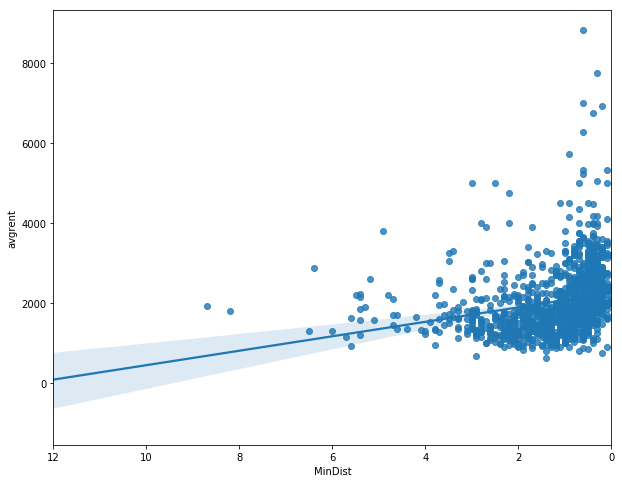

In [43]:
plt.figure(figsize=(10, 8))
sns.regplot(x = "MinDist", y = "avgrent", data = df_nmetro_avg_rent).set(xlim = (12,0))

## Distribution of Rent and Square Footage

### Distribution of Rent Over All Units

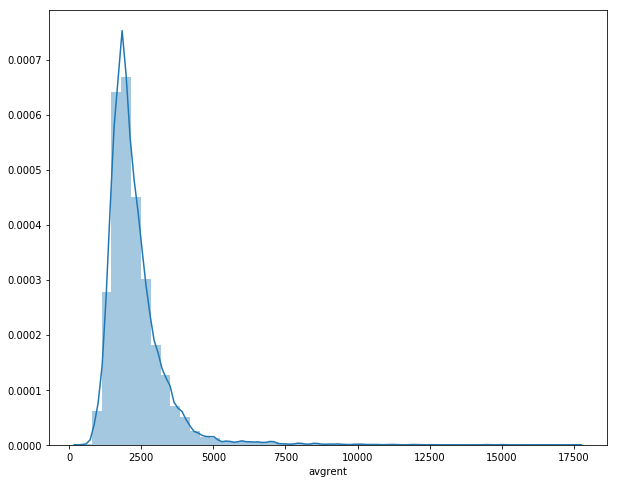

In [44]:
plt.figure(figsize=(10, 8))
sns.distplot(df_units.loc[pd.isnull(df_units.avgrent) == False,].avgrent)

### Distribution of Minimum Rent Over All Units

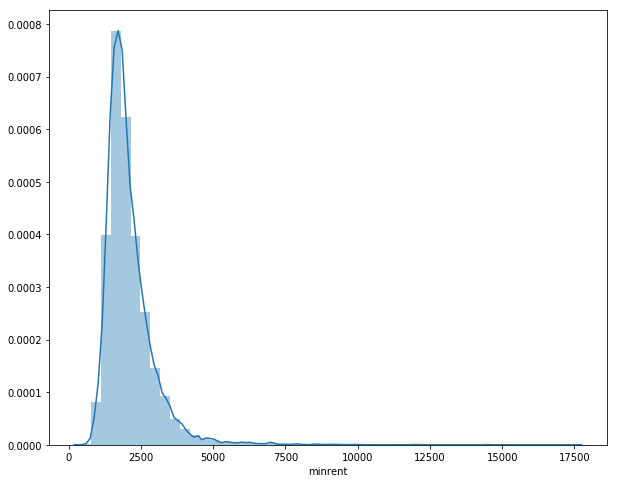

In [45]:
plt.figure(figsize=(10, 8))
sns.distplot(df_units.loc[pd.isnull(df_units.minrent) == False,].minrent)

### Distribution of Maximum Rent Over All Units


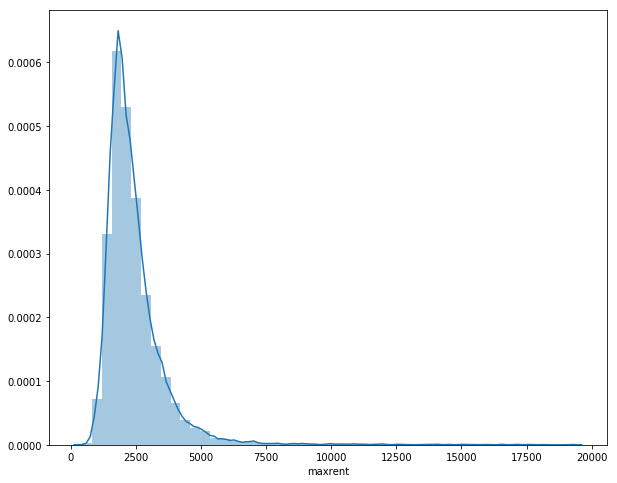

In [46]:
plt.figure(figsize=(10, 8))
sns.distplot(df_units.loc[pd.isnull(df_units.maxrent) == False,].maxrent)

### Distribution of Minimum Sq. Footage Over All Units


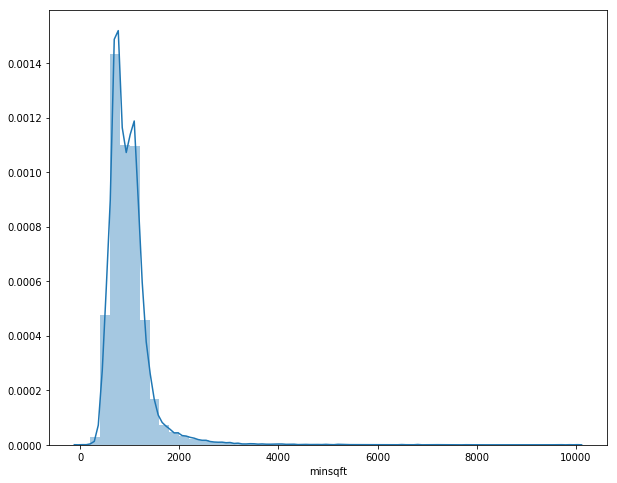

In [47]:
plt.figure(figsize=(10, 8))
sns.distplot(df_units.loc[pd.isnull(df_units.minsqft) == False,].minsqft)

### Distribution of Maximum Sq. Footage Over All Units

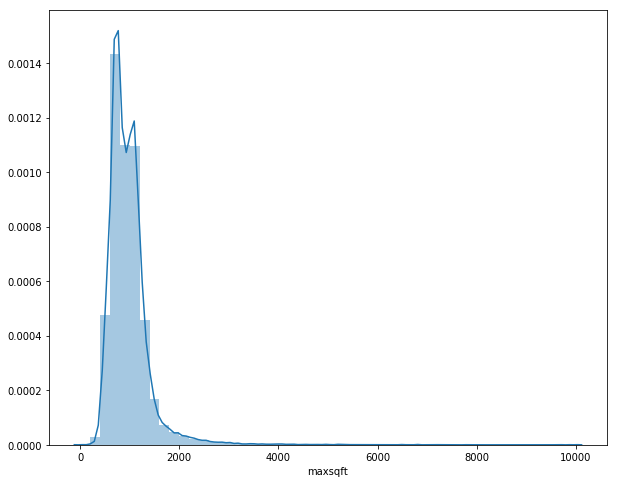

In [48]:
plt.figure(figsize=(10, 8))
sns.distplot(a = df_units.loc[pd.isnull(df_units.maxsqft) == False,].maxsqft)

### Distribution of Average Rent For all Studios 1BR, 2BR, 3BR, 4BR

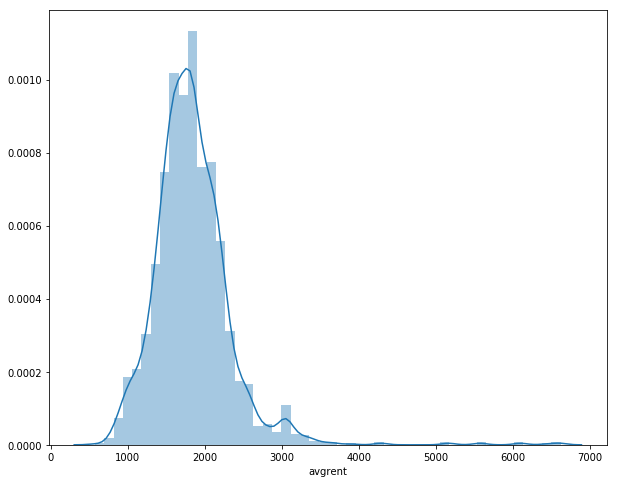

In [49]:
df_0bd = df_units.loc[df_units.beds == 0,]
df_1bd = df_units.loc[df_units.beds == 1,]
df_2bd = df_units.loc[df_units.beds == 2,]
df_3bd = df_units.loc[df_units.beds == 3,]
df_4bd = df_units.loc[df_units.beds == 4,]

plt.figure(figsize=(10, 8))
sns.distplot(a = df_0bd.loc[pd.isnull(df_0bd.avgrent) == False,].avgrent)

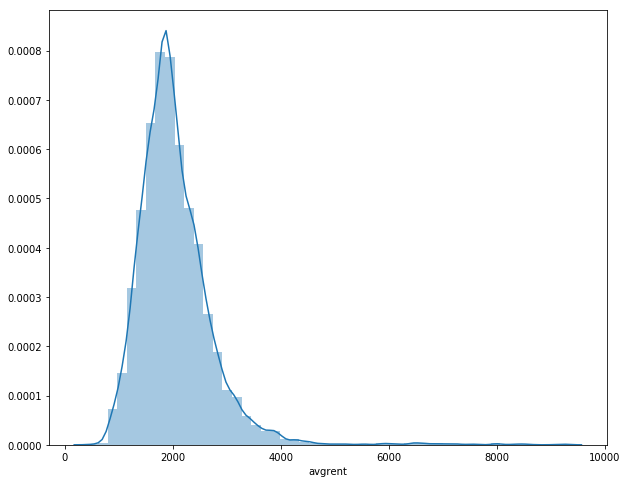

In [50]:
plt.figure(figsize=(10, 8))
sns.distplot(a = df_1bd.loc[pd.isnull(df_1bd.avgrent) == False,].avgrent)

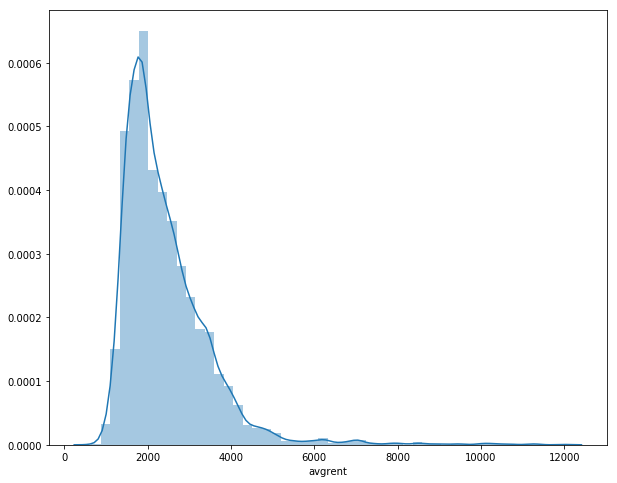

In [51]:
plt.figure(figsize=(10, 8))
sns.distplot(a = df_2bd.loc[pd.isnull(df_2bd.avgrent) == False,].avgrent)

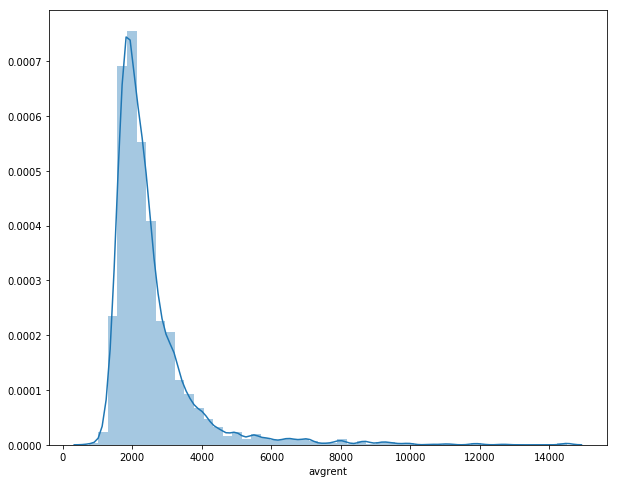

In [52]:
plt.figure(figsize=(10, 8))
sns.distplot(a = df_3bd.loc[pd.isnull(df_3bd.avgrent) == False,].avgrent)

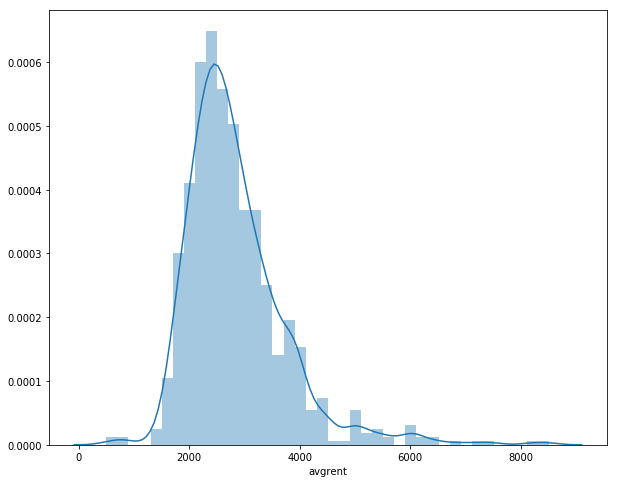

In [53]:
plt.figure(figsize=(10, 8))
sns.distplot(a = df_4bd.loc[pd.isnull(df_4bd.avgrent) == False,].avgrent)

### Distribution of Average Rent for all Bedrooms

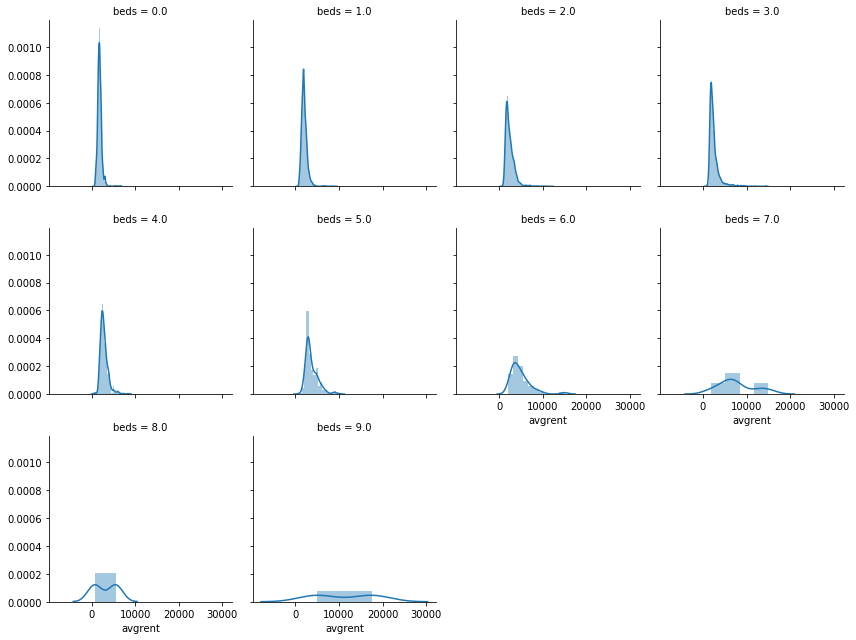

In [54]:
g = sns.FacetGrid(df_units, col="beds", col_wrap = 4, size = 3)
g = g.map(sns.distplot, "avgrent")

### Distribution of Average Rent by State


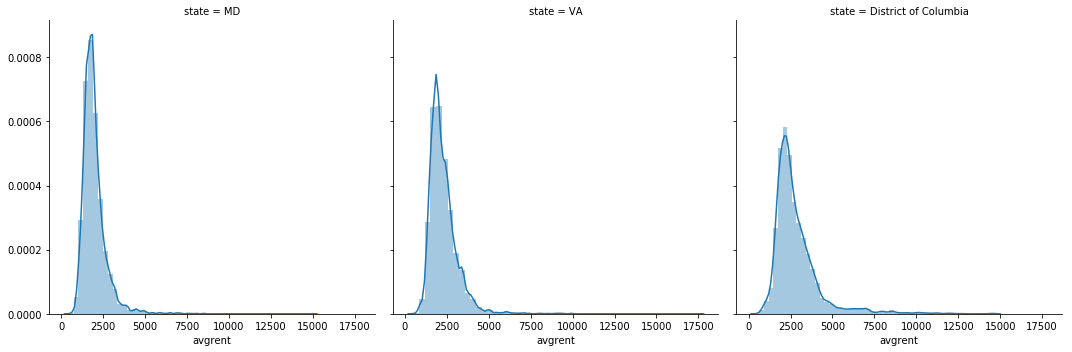

In [55]:
g = sns.FacetGrid(address_unit, col="state", col_wrap = 3, size = 5)
g = g.map(sns.distplot, "avgrent")

### Distribution of Minimum Sq. Footage by State


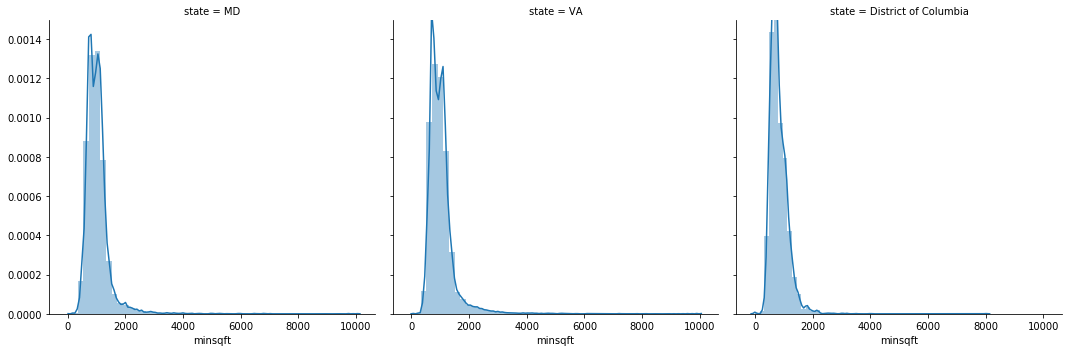

In [56]:
g = sns.FacetGrid(address_unit, col="state", col_wrap = 3, size = 5)
g = g.map(sns.distplot, "minsqft")

### Distribution of Maximum Sq. Footage by State


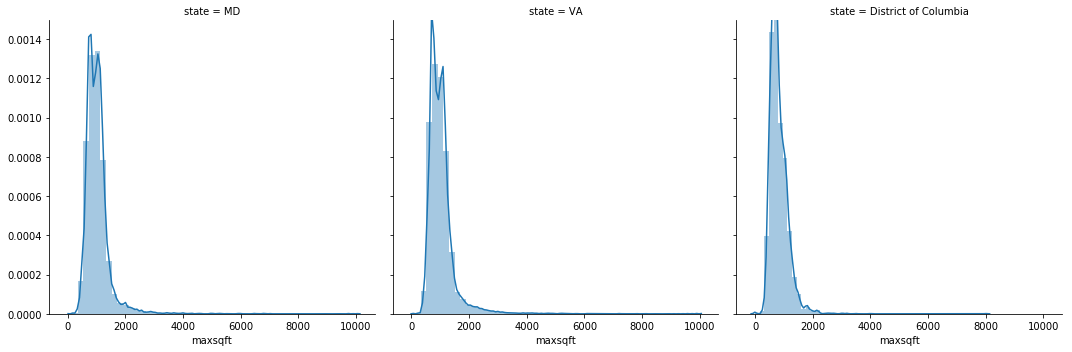

In [57]:
g = sns.FacetGrid(address_unit, col="state", col_wrap = 3, size = 5)
g = g.map(sns.distplot, "maxsqft")

### Distribution of Maximum Sq. Footage in DC (just taking a closer look)

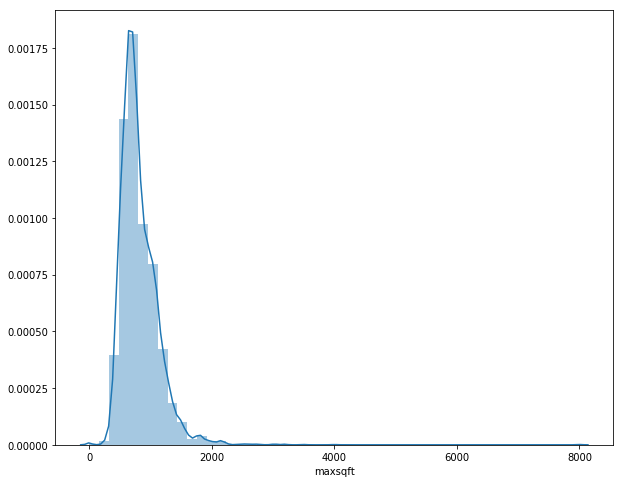

In [58]:
plt.figure(figsize=(10, 8))
sns.distplot(address_unit.loc[(address_unit.state == "District of Columbia") & 
                              (pd.isnull(address_unit.maxsqft) == False),].maxsqft)

In [59]:
query15 = ("""SELECT * FROM property.property_demographics""")
df_coord = pd.read_sql(query15, con = db_connection)

In [60]:
df_coord.head()

,pid,nunit,yearbuilt,yearren,lotsize,nstory
0,0,,,,,
1,1,,,,0.29,
2,2,,,,0.34,
3,3,144.0,1989.0,2007.0,,4.0
4,4,299.0,1963.0,,,5.0


## Oldest Property? Most Units? Largest Lot Size? Most Stories? Newest Renovated? Oldest Renovated?

In [61]:
pd.DataFrame([min(df_coord.yearbuilt[(df_coord.yearbuilt != '')]),
            max(df_coord.nunit[df_coord.nunit != '']),
            max(df_coord.lotsize[df_coord.lotsize != '']),
            max(df_coord.nstory[df_coord.nstory != '']),
            max(df_coord.yearren[df_coord.yearren != '']),
            min(df_coord.yearren[df_coord.yearren != ''])], 
             index = ['Oldest Property','Most Units', 'Largest Lot Size', 'Most Stories', 'Newly Renovated', 'Oldest Renovated'])

,0
Oldest Property,1780.0
Most Units,996.0
Largest Lot Size,6.96
Most Stories,9.0
Newly Renovated,2018.0
Oldest Renovated,1962.0


## How many are missing?

In [62]:
pd.DataFrame([sum(df_coord.nunit==''),
            sum(df_coord.yearbuilt==''),
            sum(df_coord.yearren==''),
            sum(df_coord.lotsize==''),
            sum(df_coord.nstory=='')], 
             index = ['NUnits','Year Built', 'Year Renovated', 'Lot Size', 'NStory'])

,0
NUnits,4177
Year Built,4325
Year Renovated,7038
Lot Size,5164
NStory,4206


## Distribution of Number of Units and Number of Stories?

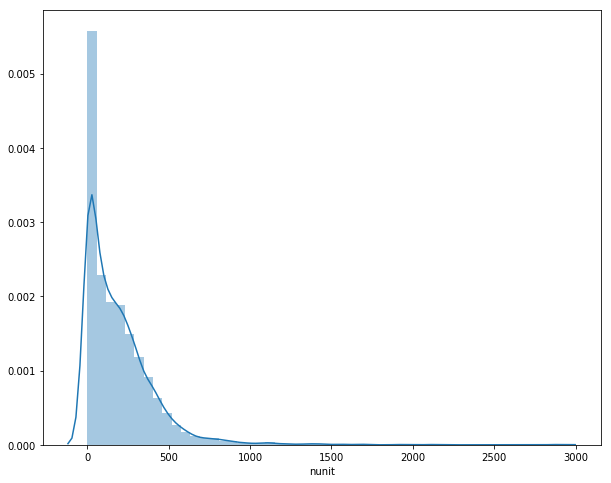

In [63]:
plt.figure(figsize=(10, 8))
sns.distplot(pd.to_numeric(df_coord.loc[(df_coord.nunit != ''),].nunit))

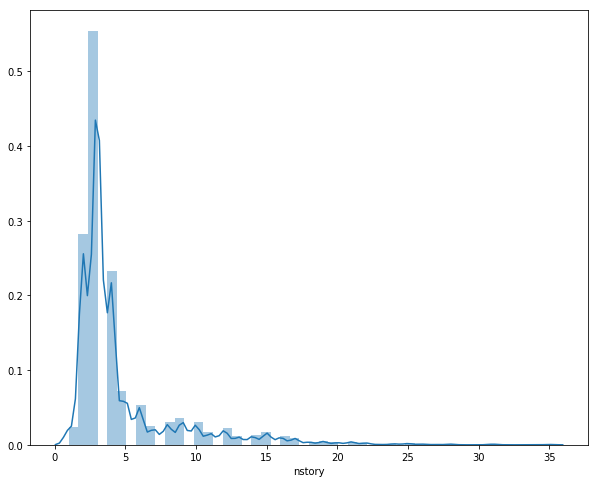

In [64]:
plt.figure(figsize=(10, 8))
sns.distplot(pd.to_numeric(df_coord.loc[(df_coord.nstory != ''),].nstory))

## Most Expensive Property

In [79]:
query = ("""SELECT * FROM full_dataset""")
df = pd.read_sql(query, con=db_connection)

df.rent = (df.minrent + df.maxrent)/2

df.rent.sort_values(ascending = False) # Index of most expensive property is 20859
df.property_name[20859]

'1289 Ballantrae Farm Dr'

In [80]:
df.property_name[20859] # In McLean VA

'1289 Ballantrae Farm Dr'

In [82]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://photos.zillowstatic.com/p_h/ISy3x3nztu34hn0000000000.jpg")

In [83]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://1cdn.cbhomes.com/s3/mediasvc-prd/properties/503941FeCE3249c-FX10025292.jpg?preset=lmain")

In [84]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://images1.apartments.com/i2/F_32vqFY_e5gvmjGOHu4P3iV3vGNScszLgWA6lHHYHU/117/1289-ballantrae-farm-dr-mclean-va-building-photo.jpg")



In [85]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://wdcimagestorageprodeast.blob.core.windows.net/mls249/Large/1000065493_5.jpg")



## Full Data Set

In [65]:
query = ("""SELECT * FROM full_dataset""")
df = pd.read_sql(query, con=db_connection)

In [68]:
df.head()


,unit_id,pid,property_name,zip_code,minrent,maxrent,beds,baths,minsqft,maxsqft,...,poverty_per_house_rec_SNAP_type_fam_unmarried,poverty_per_house_norec_SNAP_type_fam_unmarried,poverty_per_house_type_not_fam,poverty_per_house_rec_SNAP_type_not_fam,poverty_per_house_norec_SNAP_type_not_fam,poverty_per_house_type_w_children,poverty_per_house_rec_SNAP_type_w_children,poverty_per_house_norec_SNAP_type_w_children,poverty_per_house_poverty_below,poverty_per_house_poverty_at_above
0,1,0,1801 Catherine Fran Dr,20607,1300.0,1300.0,2,1,1500,1500,...,9.9,19.4,15.4,32.2,14.8,40.3,33.9,40.5,2.4,97.6
1,2,1,17211 Summerwood Ln,20607,3000.0,3000.0,4,5,5002.240151,5002.240151,...,9.9,19.4,15.4,32.2,14.8,40.3,33.9,40.5,2.4,97.6
2,3,2,911 Strausberg St,20607,3000.0,3000.0,4,4,3159.504746,3159.504746,...,9.9,19.4,15.4,32.2,14.8,40.3,33.9,40.5,2.4,97.6
3,4,3,Daniel's Run,20783,1415.0,1470.0,1,1,725,725,...,57.5,30.6,30.1,10.1,32.7,42.6,78.4,38.1,13,87
4,5,3,Daniel's Run,20783,1470.0,1470.0,1,1,725,725,...,57.5,30.6,30.1,10.1,32.7,42.6,78.4,38.1,13,87
